In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
years = [f"{x:04d}" for x in np.arange(32,1952,12)]
ii =0
A1= np.zeros([80,100,160])
for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:160,-220:]
    TAUX2 = data1.variables['TAUX'][0,80:160,:180]
    TAUX = np.hstack((TAUX1,TAUX2))
    A1[:,:,ii] = TAUX[:,::4]
    ii = ii+1
    lont1 = data1.variables['lon'][-220:]
    lont2 = data1.variables['lon'][:180]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:160]

    #np.savetxt('new340-500.out',result)

In [3]:
A1ave = np.nanmean(A1,axis=2)
y = np.expand_dims(A1ave, axis=2)
AA1 = A1-y

In [4]:
AA1.shape

(80, 100, 160)

In [5]:
TX = np.reshape(AA1,[8000,160])

In [6]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(340,500)]
i =0
result = np.zeros((80,100,160))

In [7]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        PREC_F = data.variables['TEMP'][0,0,:,:]
        ##50-70S,300-40
        PREC_F[PREC_F>100]=0
        PREC_F = PREC_F[200:600:5,550:1550:10]
        lont = data.variables['TLONG'][200:600:5,550:1550:10]
        latt = data.variables['TLAT'][200:600:5,550:1550:10]
        result[:,:,i] = PREC_F
        
        i = i + 1
#********************************************************************

In [8]:
reave = np.nanmean(result, axis=2)
yy = np.expand_dims(reave, axis=2)
result1 = result - yy

In [9]:
SST = np.reshape(result1,[8000,160])

In [10]:
sststr = np.std(SST)

In [11]:
SST = SST/sststr

In [12]:
txstr = np.std(TX)

In [13]:
TX = TX/txstr

In [14]:
result = np.dot(SST,TX.T)


In [15]:
result.shape

(8000, 8000)

In [16]:
from scipy import linalg
U, s, Vh = linalg.svd(result)

In [17]:
U1 = U[:,0]

In [18]:
U1.shape

(8000,)

In [19]:
SST.shape

(8000, 160)

In [20]:
time = np.dot(U1.T,SST)

In [21]:
time.shape

(160,)

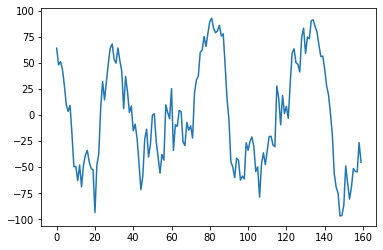

In [22]:
plt.plot(time)

In [23]:
vvv = Vh[0,:]

In [24]:
vvv

array([-0.00220456, -0.00238863, -0.00281486, ..., -0.00733119,
       -0.008166  , -0.00918654])

In [25]:
TX

array([[ 0.30011359,  0.24463231,  0.47206487, ..., -0.46179839,
        -0.04302535,  0.29367162],
       [ 0.29248451,  0.35367279,  0.53126596, ..., -0.48670919,
        -0.1088068 ,  0.26238486],
       [ 0.32359794,  0.44543918,  0.63167051, ..., -0.50988342,
        -0.189391  ,  0.19116618],
       ...,
       [-1.05516115,  1.82462999,  0.11780142, ...,  0.73612997,
        -0.11531727, -0.96395786],
       [-0.89211534,  1.80289951,  0.27400781, ...,  0.72724128,
        -0.26925766, -0.97705356],
       [-0.7670713 ,  1.90682758,  0.24825135, ...,  0.73396476,
        -0.40010705, -0.93851696]])

In [26]:
time2 = np.dot(vvv.T,TX)

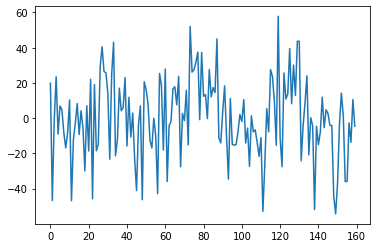

In [27]:
plt.plot(time2)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


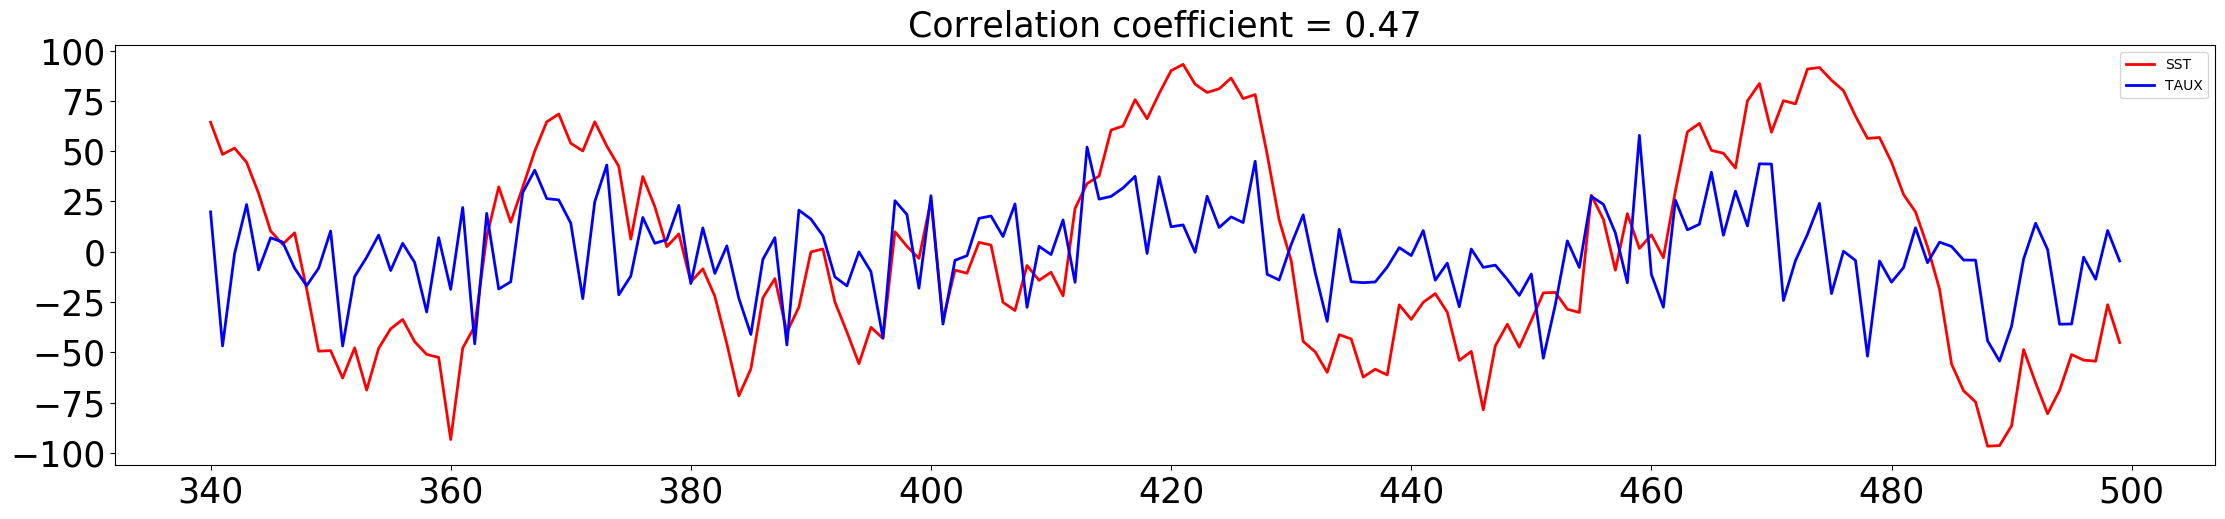

In [28]:
my_font = {'fontname':'Cambria', 'size':'25'}
##################################################################
fig = plt.figure(figsize=(30,6), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(time,'red',linewidth=2,label= 'SST')
ax0.plot(time2,'blue',linewidth=2, label = 'TAUX')
ax0.legend()
#########################################
#plt.xticks(range(24,625,60), ['1950', '1955', '1960', '1965', '1970','1975', '1980', '1985','1990','1995','2000'],**my_font)
plt.xticks(range(0,161,20), ['340', '360', '380', '400', '420','440', '460', '480','500'],**my_font)
plt.yticks(**my_font)
ax0.set_title('Correlation coefficient = 0.47',**my_font)
plt.savefig("aaa.png",bbox_inches='tight',dpi=fig.dpi)

In [29]:
import scipy.stats as stats
stats.pearsonr(time, time2)

(0.4759869010874064, 2.0001084386573025e-10)

In [30]:
V = np.reshape(U[:,0],[80,100])

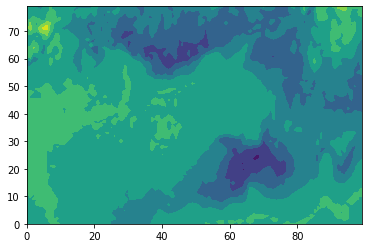

In [31]:
plt.contourf(V)

In [32]:
V[latt==-1]=np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


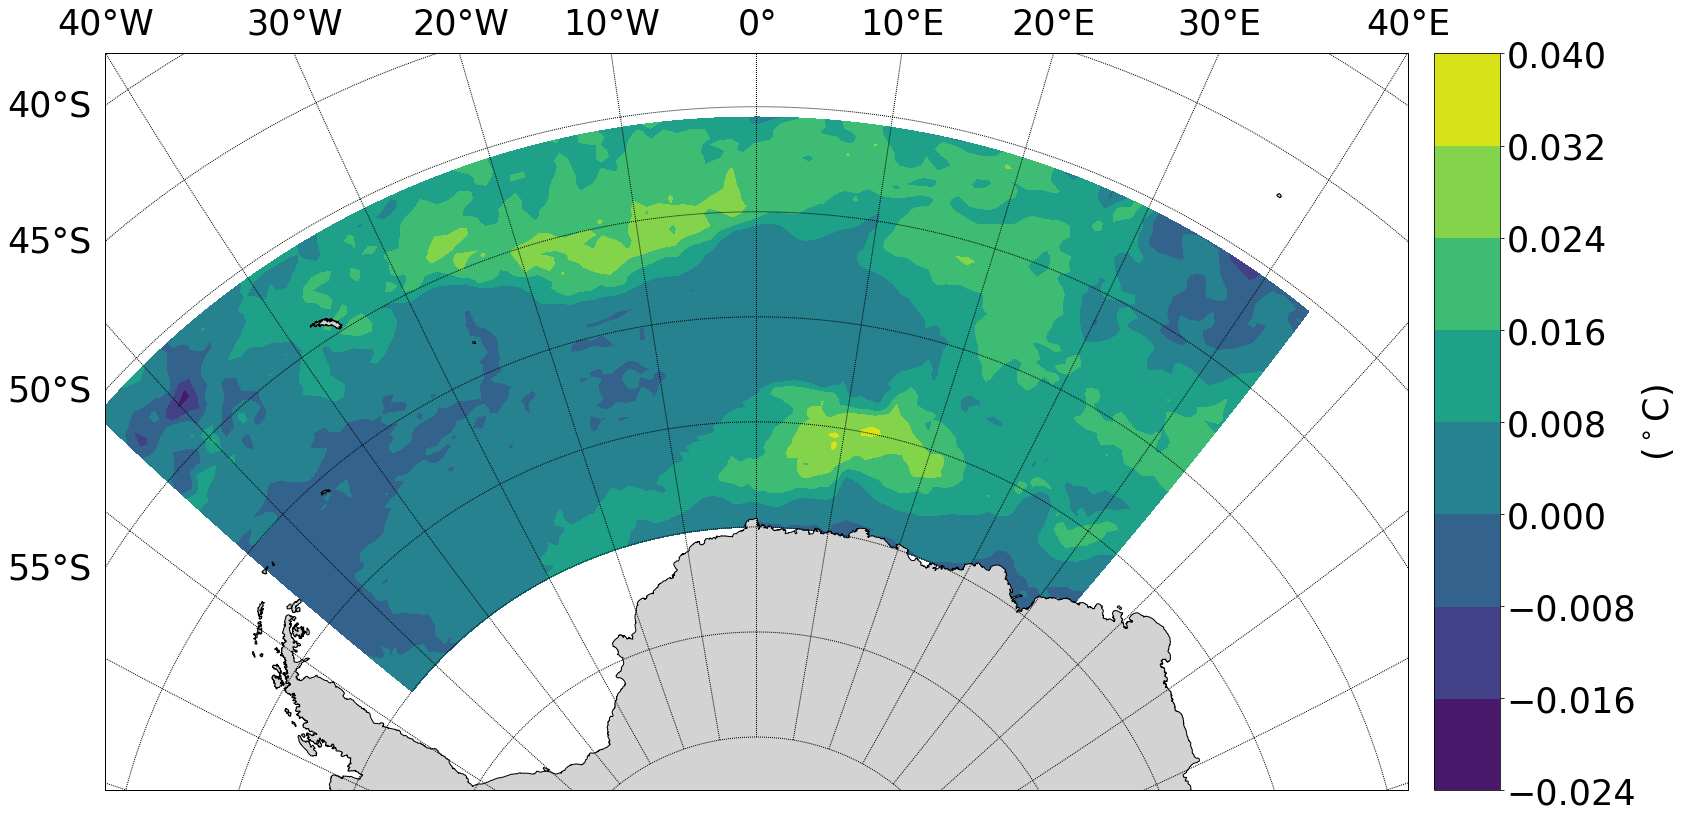

In [33]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-0.08,-0.04,0,0.04,0.08]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 6900000,height = 3900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-V)#,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP)#extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
#cbar.set_label('(N/m$^2$)', **my_font)
cbar.set_label('($^\circ$C)', **my_font)
plt.savefig("SVD.png",bbox_inches='tight')

In [35]:
s[:6]

array([85987.68533036, 54358.05359372, 35373.57466418, 28371.62828032,
       22749.49519944, 18294.47151121])